In [1]:
# importing libraries required for our model
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import Adam
import keras

Using TensorFlow backend.


In [2]:
epochs = 100
# our defining our model 
my_model = Sequential()
my_model.add(LSTM(units = 64, activation='tanh', input_shape = (33,1), return_sequences=True))
my_model.add(Dropout(0.5))
my_model.add(LSTM(units= 32, activation='tanh'))
my_model.add(Dropout(0.5))
my_model.add(Dense(1))
# opt = Adam(lr=1e-3, decay=1e-3/epochs)
my_model.compile(loss = 'mse',optimizer = 'rmsprop', metrics = ['mean_squared_error'])
my_model.summary()

# from keras.utils import plot_model
# plot_model(my_model, to_file='temp1.png')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 33, 64)            16896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [38]:
%load_ext tensorboard
from datetime import datetime
from keras import Input, Model
from keras.layers import concatenate, Activation

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import keras.backend as K

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


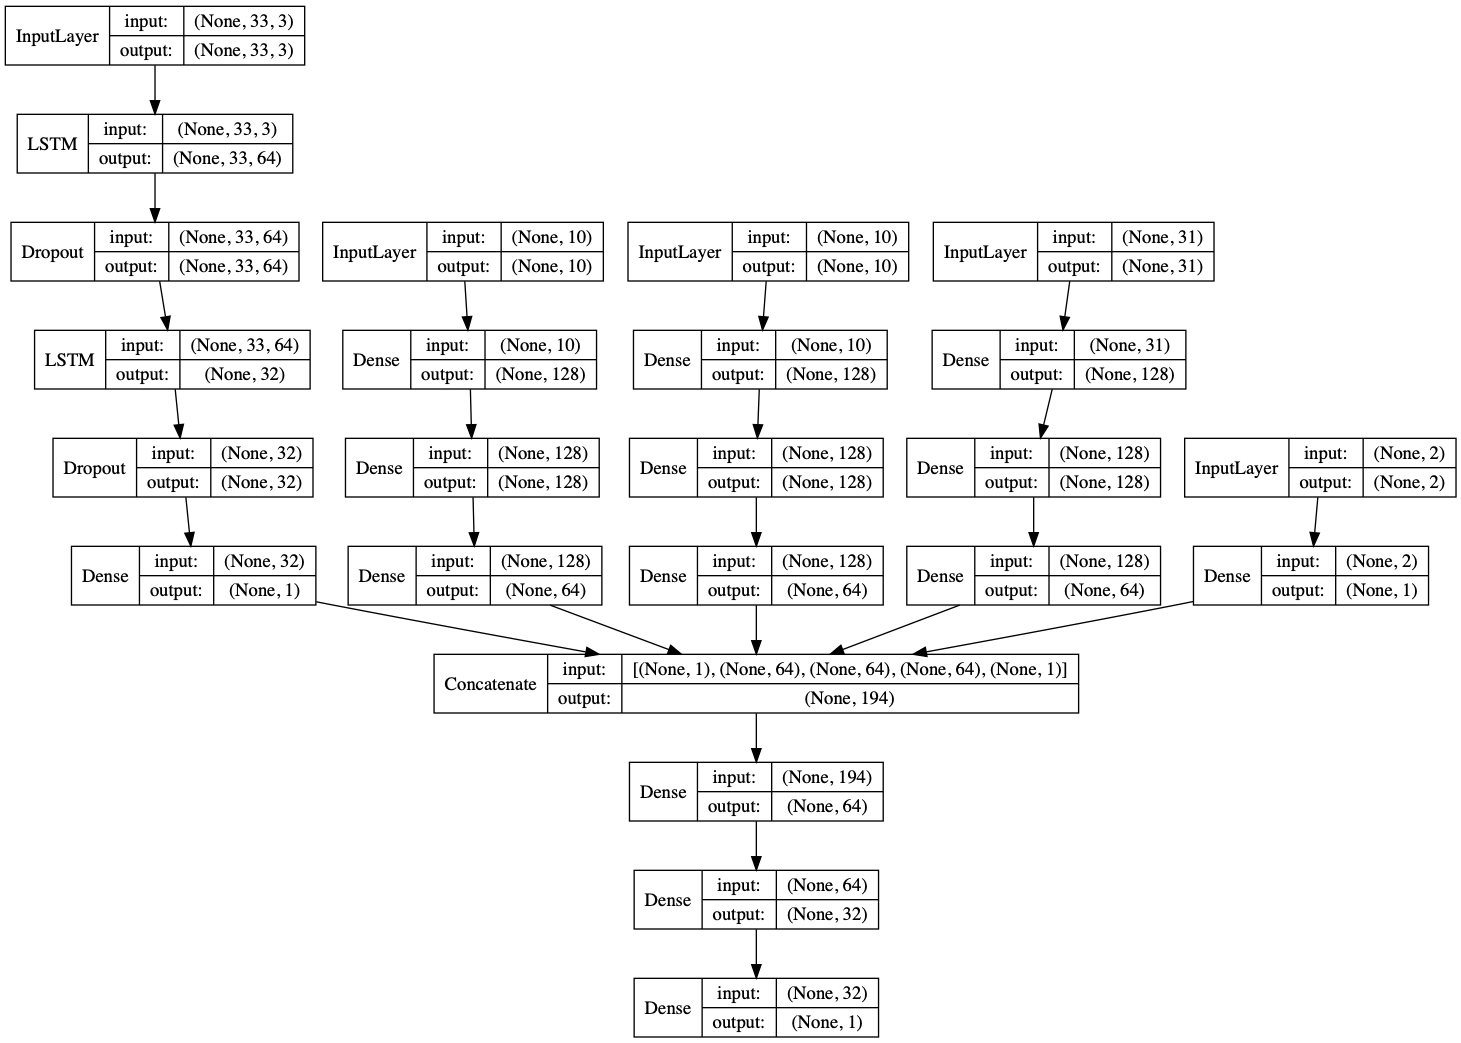

In [52]:
# define two sets of inputs
inputA = Input(shape=(33,3))
inputB = Input(shape=(10,))
inputC = Input(shape=(10,))
inputE = Input(shape=(31,))
inputD = Input(shape=(2,))
 
# the first branch operates on the first input
x = LSTM(units = 64, activation='tanh', input_shape = (33,1), return_sequences=True)(inputA)
x = Dropout(0.5)(x)
x = LSTM(units= 32, activation='tanh')(x)
x = Dropout(0.5)(x)
x = Dense(1)(x)
x = Model(inputs=inputA, outputs=x)
 
# the second branch opreates on the second input
y = Dense(128, activation="relu")(inputB)
y = Dense(128, activation="relu")(y)
y = Dense(64, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# the third branch opreates on the third input
z = Dense(128, activation="relu")(inputC)
z = Dense(128, activation="relu")(z)
z = Dense(64, activation="relu")(z)
z = Model(inputs=inputC, outputs=z)

# the fourth branch opreates on the fourth input
q = Dense(128, activation="relu")(inputE)
q = Dense(128, activation="relu")(q)
q = Dense(64, activation="relu")(q)
q = Model(inputs=inputE, outputs=q)

# the fifth branch opreates on the fifth input
p = Dense(1, activation="relu")(inputD)
p = Model(inputs=inputD, outputs=p)
 
# combine the output of the two branches
combined = concatenate([x.output, y.output, z.output, q.output, p.output])
 
# apply a FC layer and then a regression prediction on the
# combined outputs
o = Dense(64, activation="relu")(combined)
o = Dense(32, activation="relu")(o)
o = Dense(1, activation="linear")(o)
 
# our model will accept the inputs of the three branches and
# then output a single value
model = Model(inputs=[x.input, y.input, z.input, q.input, p.input], outputs=o)

from keras.utils import plot_model
plot_model(model, to_file='temp1.png', show_shapes=True, show_layer_names=False)